In [72]:
import os
import json
import sys
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd

In [73]:
INPUT_PATH="./data_files/store_model_scores/"

In [74]:
curr_file_id=0
lb_file_id=0
ub_file_id=3
ids_of_all_children=set()
parent_to_child_mapping=dict()
child_tags=dict()
parent_tags=dict()

In [75]:
for curr_file_id in range(4):
    with open(INPUT_PATH+f"sorted/test_set_q_candidate_model_scores_{curr_file_id}.json",'r') as fd:
        df=json.load(fd)
    for curr_key in df:
        ids_of_all_children.add(curr_key)
        for ideal_q in df[curr_key]['expected_questions']:
            print(ideal_q)
            try:
                parent_to_child_mapping[ideal_q].append(curr_key)
            except:
                parent_to_child_mapping[ideal_q]=[curr_key]

314242
168214
101268
263400
130161
8676
264175
267357
276433
391486
46586
180172
292265
408987
425953
49809
293152
418597
418692
401726
147181
348210
103785
282805
335311
413898
156430
201323
211842
238265
7074
215255
337304
81584
172753
356948
58968
129178
170921
130404
119506
15828
449595
78696
325046
15142
4736
15373
3213
66156
217655
380620
455518
467793
468266
115369
191536
355787
142985
144227
55922
445950
126611
157354
191536
385893
164194
105049
13620
127188
30211
62694
485230
65512
321299
390900
6301
6325
430707
296020
31497
94906
372449
475345
252355
137657
197951
273978
486028
125319
231893
150355
27578
8440
462978
196925
29482
3305
132139
502667
310108
46585
340704
201323
200090
68282
52926
137540
37335
417142
403084
464476
147181
135234
242822
115159
369393
165455
494561
503218
224569
43021
17434
411718
441586


In [76]:
len(ids_of_all_children)

100

In [77]:
del df

### Now, we have IDs of all duplicate questions

In [78]:
tags_freq=dict()

In [79]:
parent_to_child_mapping

{314242: ['440482'],
 168214: ['440494'],
 101268: ['440952'],
 263400: ['441529'],
 130161: ['441910'],
 8676: ['442377'],
 264175: ['442377'],
 267357: ['442377'],
 276433: ['442377'],
 391486: ['442377'],
 46586: ['443655'],
 180172: ['444322'],
 292265: ['444436'],
 408987: ['444436'],
 425953: ['444480'],
 49809: ['445624'],
 293152: ['445624'],
 418597: ['445624'],
 418692: ['445624'],
 401726: ['445642'],
 147181: ['446208', '516399'],
 348210: ['446728'],
 103785: ['448230'],
 282805: ['448230'],
 335311: ['449445'],
 413898: ['449445'],
 156430: ['450696'],
 201323: ['450696', '508108'],
 211842: ['450696'],
 238265: ['450924'],
 7074: ['452368'],
 215255: ['452368'],
 337304: ['452571'],
 81584: ['452677'],
 172753: ['452917'],
 356948: ['452917'],
 58968: ['454002'],
 129178: ['454921'],
 170921: ['455498'],
 130404: ['456646'],
 119506: ['457482'],
 15828: ['457636'],
 449595: ['458755'],
 78696: ['460904'],
 325046: ['461054'],
 15142: ['462978'],
 4736: ['465119'],
 15373

In [85]:
418692 in parent_to_child_mapping

True

In [87]:
for curr_file_id in range(50):
    with open(f"./data_files/All_training_files/vectorize_dup_full/{curr_file_id}.json",'r') as fd:
        df=json.load(fd)
    print("curr file id is ", curr_file_id)
    for curr_key, curr_val in df.items():
        # in the role of a parent
        print(curr_key)
        if int(curr_key) in parent_to_child_mapping:
            print("FOUND A PARENT")
            for curr_child in parent_to_child_mapping[int(curr_key)]:
                if curr_child not in parent_tags:
                    parent_tags[curr_child]=[]
                parent_tags[curr_child].extend(curr_val['tags_list'])
                #parent_tags[curr_child].extend(curr_val['tags_list'])
        if curr_key in ids_of_all_children:
            child_tags[curr_key]=curr_val['tags_list']

curr file id is  0
4
6
8
9
11
13
14
16
17
19
23
24
25
34
36
39
42
48
59
61
66
72
79
80
85
88
90
104
108
109
120
123
126
129
134
145
146
163
164
173
174
175
176
177
180
192
194
227
231
234
237
246
249
260
263
264
265
279
289
308
313
328
330
336
337
361
369
371
382
387
395
402
403
415
419
427
429
438
469
470
482
484
502
514
535
549
561
562
564
580
588
592
594
601
609
610
622
626
644
650
651
657
664
683
696
698
705
709
717
728
742
746
752
761
766
769
773
800
805
810
826
832
833
835
842
845
855
871
879
888
898
899
904
905
918
930
935
944
947
959
972
1005
1010
1024
1033
1037
1040
1041
1042
1053
1064
1069
1070
1083
1085
1104
1108
1131
1145
1156
1160
1171
1176
1180
1189
1229
1234
1237
1241
1261
1276
1284
1292
1300
1304
1306
1311
1313
1314
1323
1329
1376
1383
1384
1387
1390
1401
1408
1409
1417
1451
1453
1457
1476
1496
1503
1505
1508
1528
1535
1537
1542
1551
1576
1584
1598
1600
1607
1610
1615
1623
1625
1644
1669
1679
1683
1705
1708
1709
1711
1734
1746
1760
1762
1766
1790
1823
1829
1836
1848
185

curr file id is  1
14810
14823
14827
14828
14837
14843
14857
14872
14873
14874
14878
14884
14893
14909
14911
14923
14934
14943
14963
14967
15007
15015
15023
15024
15034
15040
15047
15053
15056
15057
15062
15066
15087
15102
15109
15111
15124
15133
15139
15142
FOUND A PARENT
15163
15171
15176
15187
15190
15203
15204
15208
15211
15219
15228
15240
15241
15247
15254
15266
15272
15302
15305
15310
15315
15326
15334
15349
15365
15366
15373
FOUND A PARENT
15376
15390
15395
15398
15399
15412
15414
15423
15446
15470
15478
15481
15486
15496
15504
15513
15514
15528
15537
15573
15583
15593
15621
15632
15635
15636
15649
15656
15674
15678
15681
15687
15690
15694
15695
15700
15708
15709
15716
15729
15731
15732
15734
15735
15744
15747
15768
15774
15784
15788
15798
15805
15815
15816
15822
15828
FOUND A PARENT
15838
15841
15851
15857
15871
15880
15899
15900
15917
15949
15954
15979
15995
16003
16007
16064
16067
16073
16074
16096
16097
16100
16110
16113
16114
16140
16142
16145
16155
16159
16161
16164
16167


curr file id is  2
29883
29886
29890
29925
29927
29943
29971
29976
29980
29988
29993
29995
30003
30004
30005
30018
30026
30036
30049
30058
30062
30066
30067
30071
30073
30074
30076
30080
30082
30094
30099
30101
30121
30145
30148
30152
30160
30170
30171
30183
30184
30188
30209
30211
FOUND A PARENT
30222
30230
30239
30251
30281
30286
30288
30295
30297
30302
30307
30310
30311
30318
30319
30321
30328
30337
30342
30346
30354
30373
30374
30376
30379
30397
30425
30428
30430
30454
30465
30474
30485
30494
30504
30505
30521
30526
30529
30539
30540
30541
30543
30563
30566
30569
30571
30585
30594
30610
30627
30632
30651
30653
30660
30686
30696
30706
30710
30712
30729
30752
30754
30763
30770
30775
30781
30788
30790
30800
30811
30824
30833
30835
30847
30856
30861
30877
30879
30884
30903
30915
30928
30931
30940
30946
30947
30953
30962
30964
30966
30972
30985
30995
30998
31007
31031
31044
31051
31053
31057
31059
31068
31075
31077
31088
31090
31096
31097
31121
31127
31128
31129
31140
31151
31158
31163


curr file id is  3
42345
42354
42357
42366
42383
42386
42394
42395
42396
42407
42416
42422
42428
42437
42438
42446
42452
42460
42466
42468
42480
42482
42483
42489
42490
42499
42505
42512
42515
42519
42531
42546
42550
42554
42557
42558
42566
42575
42581
42582
42587
42610
42620
42627
42633
42643
42648
42649
42672
42690
42693
42703
42706
42710
42721
42732
42740
42749
42761
42762
42763
42770
42774
42778
42785
42788
42793
42797
42804
42814
42822
42826
42828
42830
42833
42852
42863
42876
42877
42879
42894
42899
42901
42908
42934
42936
42937
42950
42954
42966
42973
42980
42984
42987
42990
42996
43006
43019
43021
FOUND A PARENT
43044
43051
43076
43086
43099
43111
43116
43126
43134
43157
43180
43194
43196
43199
43201
43211
43218
43223
43224
43243
43249
43253
43259
43267
43283
43289
43290
43291
43315
43320
43321
43322
43324
43335
43344
43349
43354
43368
43374
43393
43400
43422
43427
43455
43458
43459
43466
43490
43500
43503
43504
43507
43509
43511
43524
43525
43533
43536
43569
43580
43584
43589


curr file id is  4
54184
54188
54199
54200
54207
54217
54219
54221
54222
54227
54230
54237
54249
54255
54264
54277
54295
54299
54318
54320
54334
54337
54364
54365
54380
54387
54401
54418
54419
54421
54426
54440
54459
54475
54482
54487
54495
54500
54503
54504
54512
54522
54536
54539
54546
54566
54567
54578
54579
54585
54586
54590
54606
54612
54626
54652
54658
54669
54674
54683
54686
54702
54703
54708
54709
54725
54737
54753
54754
54758
54760
54770
54771
54789
54790
54791
54795
54797
54808
54833
54836
54837
54851
54861
54864
54866
54867
54868
54877
54882
54886
54889
54909
54926
54929
54943
54952
54953
54955
54957
54963
54966
54971
54972
54978
54980
54989
54991
54998
55010
55013
55035
55039
55042
55054
55056
55060
55061
55083
55093
55096
55099
55101
55113
55114
55129
55130
55139
55140
55147
55159
55179
55180
55203
55206
55210
55218
55223
55256
55270
55273
55279
55296
55297
55313
55317
55322
55323
55330
55340
55342
55350
55360
55363
55365
55369
55375
55386
55391
55403
55411
55414
55421
554

curr file id is  5
66633
66635
66636
66643
66649
66654
66668
66671
66677
66687
66709
66720
66722
66727
66728
66730
66731
66743
66750
66759
66767
66770
66773
66776
66777
66800
66810
66819
66837
66840
66870
66875
66880
66882
66885
66893
66904
66912
66919
66921
66922
66923
66934
66952
66964
66986
67000
67004
67009
67015
67021
67029
67045
67052
67056
67063
67069
67082
67093
67103
67104
67117
67125
67127
67141
67151
67154
67167
67171
67174
67180
67183
67185
67200
67207
67209
67219
67223
67244
67273
67275
67299
67300
67339
67347
67354
67366
67368
67370
67379
67394
67407
67410
67418
67421
67426
67444
67454
67457
67475
67492
67499
67512
67516
67518
67536
67554
67556
67557
67559
67561
67581
67588
67612
67621
67627
67628
67629
67631
67640
67647
67659
67665
67666
67669
67676
67682
67685
67699
67706
67713
67725
67729
67734
67736
67760
67761
67780
67788
67790
67798
67810
67819
67831
67835
67859
67875
67879
67890
67894
67898
67916
67929
67937
67959
67964
67980
68006
68012
68015
68018
68029
68042
680

curr file id is  6
80859
80863
80875
80876
80884
80892
80903
80908
80918
80923
80940
80958
80963
80969
80980
80993
80997
81008
81020
81021
81022
81052
81061
81062
81067
81071
81073
81099
81104
81108
81132
81150
81154
81158
81160
81174
81180
81191
81194
81202
81209
81212
81214
81236
81238
81243
81260
81268
81272
81278
81280
81283
81285
81288
81294
81295
81305
81306
81315
81317
81323
81338
81344
81346
81347
81350
81360
81361
81362
81376
81392
81404
81406
81410
81423
81445
81448
81449
81451
81459
81472
81484
81491
81495
81497
81504
81512
81520
81521
81533
81543
81548
81552
81556
81557
81560
81566
81567
81571
81584
FOUND A PARENT
81587
81589
81591
81597
81617
81627
81628
81631
81635
81644
81656
81657
81671
81674
81686
81698
81716
81723
81727
81730
81732
81745
81768
81770
81784
81786
81787
81788
81791
81797
81829
81830
81832
81850
81862
81870
81874
81896
81902
81904
81905
81911
81934
81945
81949
81963
81972
81973
81991
81994
82003
82008
82022
82036
82047
82058
82064
82074
82093
82099
82109


curr file id is  7
94820
94860
94864
94866
94875
94882
94884
94885
94906
FOUND A PARENT
94912
94927
94930
94932
94934
94935
94948
94952
94959
94975
94977
94997
94999
95005
95007
95041
95053
95055
95059
95061
95071
95074
95077
95087
95089
95098
95105
95106
95112
95120
95134
95163
95181
95183
95188
95192
95211
95213
95218
95221
95222
95235
95257
95277
95286
95297
95305
95326
95346
95361
95364
95377
95378
95379
95389
95419
95426
95432
95442
95458
95459
95485
95492
95500
95506
95510
95525
95543
95547
95554
95567
95575
95578
95600
95606
95625
95628
95631
95635
95642
95649
95651
95655
95683
95700
95710
95715
95724
95727
95731
95732
95760
95767
95800
95820
95821
95824
95834
95836
95842
95850
95852
95858
95862
95866
95868
95875
95886
95890
95895
95909
95910
95912
95950
95953
95954
95956
95967
95974
95988
96003
96027
96029
96040
96041
96042
96051
96054
96059
96066
96086
96107
96113
96114
96123
96133
96137
96150
96153
96156
96160
96164
96185
96196
96211
96218
96226
96233
96247
96249
96250
96264


curr file id is  8
108889
108892
108900
108926
108927
108938
108940
108947
108971
108991
109000
109023
109027
109032
109035
109044
109064
109066
109070
109072
109083
109086
109087
109124
109129
109134
109141
109149
109153
109154
109179
109186
109188
109199
109210
109213
109215
109230
109232
109249
109251
109262
109275
109280
109281
109284
109293
109294
109305
109317
109318
109319
109325
109343
109345
109364
109371
109383
109399
109402
109409
109417
109429
109432
109440
109444
109449
109464
109480
109488
109491
109520
109528
109553
109557
109579
109580
109592
109594
109608
109618
109620
109631
109644
109666
109668
109684
109705
109710
109717
109719
109731
109736
109746
109753
109759
109761
109762
109769
109776
109781
109790
109797
109810
109815
109825
109830
109836
109854
109855
109858
109859
109861
109877
109880
109883
109916
109922
109930
109931
109934
109937
109948
109970
109976
109993
110008
110015
110016
110018
110030
110031
110032
110043
110052
110078
110081
110083
110088
110121
1

curr file id is  9
121945
121946
121947
121962
121979
121981
121988
122033
122036
122057
122067
122079
122088
122089
122097
122098
122099
122102
122104
122105
122107
122108
122109
122110
122115
122127
122144
122154
122160
122173
122175
122178
122187
122192
122198
122205
122208
122215
122216
122226
122229
122234
122238
122239
122253
122254
122267
122271
122273
122276
122277
122278
122282
122298
122301
122302
122313
122316
122324
122327
122348
122359
122362
122367
122388
122394
122400
122402
122404
122407
122422
122424
122445
122451
122453
122455
122459
122463
122468
122483
122493
122510
122514
122523
122524
122531
122533
122544
122546
122547
122571
122582
122583
122589
122593
122595
122607
122614
122615
122616
122634
122639
122641
122642
122649
122670
122684
122685
122687
122688
122690
122695
122714
122724
122728
122736
122739
122741
122745
122749
122752
122763
122766
122767
122768
122772
122775
122777
122778
122781
122782
122799
122815
122821
122826
122834
122838
122841
122846
122847
1

curr file id is  10
134095
134099
134103
134110
134125
134127
134131
134148
134155
134158
134159
134161
134169
134182
134188
134202
134214
134224
134235
134237
134244
134245
134251
134253
134263
134266
134284
134295
134298
134309
134314
134321
134331
134338
134344
134359
134366
134371
134374
134375
134378
134379
134387
134388
134392
134393
134399
134408
134424
134442
134452
134453
134456
134459
134463
134470
134481
134485
134490
134492
134494
134501
134505
134510
134517
134519
134520
134526
134543
134568
134569
134572
134574
134575
134580
134581
134585
134594
134602
134615
134626
134629
134633
134644
134650
134653
134655
134656
134658
134673
134680
134683
134688
134691
134694
134698
134712
134727
134728
134731
134741
134742
134746
134748
134778
134785
134791
134796
134797
134805
134815
134821
134825
134833
134834
134845
134847
134858
134866
134867
134871
134872
134882
134883
134885
134887
134905
134906
134914
134917
134921
134934
134937
134948
134950
134956
134958
134962
134969
134976


curr file id is  11
146505
146520
146522
146528
146531
146543
146557
146575
146576
146582
146602
146604
146607
146622
146644
146657
146659
146661
146668
146700
146704
146715
146730
146732
146737
146741
146743
146745
146750
146766
146777
146789
146794
146795
146801
146805
146807
146815
146835
146839
146840
146841
146850
146873
146888
146890
146893
146896
146897
146901
146906
146914
146916
146924
146931
146936
146942
146943
146963
146970
146973
146980
146986
146989
146994
147016
147033
147040
147049
147052
147053
147057
147062
147083
147084
147100
147104
147125
147126
147129
147130
147154
147164
147172
147173
147178
147181
FOUND A PARENT
147182
147184
147187
147207
147208
147210
147240
147245
147260
147264
147267
147298
147307
147315
147323
147328
147339
147351
147359
147362
147364
147372
147376
147378
147391
147408
147416
147420
147437
147444
147449
147451
147454
147458
147459
147460
147462
147468
147486
147491
147500
147505
147507
147515
147528
147530
147533
147536
147551
147557
147558

curr file id is  12
157662
157667
157677
157685
157689
157692
157693
157697
157705
157717
157728
157737
157747
157755
157759
157761
157770
157773
157781
157786
157795
157807
157812
157827
157832
157845
157846
157850
157856
157862
157873
157894
157896
157898
157905
157911
157917
157923
157924
157933
157938
157944
157947
157959
157969
157998
158004
158008
158044
158055
158070
158091
158104
158120
158121
158122
158124
158129
158133
158139
158149
158150
158151
158152
158155
158172
158174
158175
158189
158200
158209
158218
158219
158229
158232
158241
158256
158257
158268
158277
158278
158279
158282
158283
158310
158319
158324
158328
158330
158336
158341
158343
158359
158369
158371
158372
158375
158380
158382
158384
158385
158388
158392
158420
158428
158431
158436
158438
158457
158460
158474
158476
158479
158482
158492
158502
158508
158509
158510
158512
158514
158519
158520
158521
158534
158536
158539
158544
158546
158557
158568
158571
158574
158584
158585
158593
158617
158618
158628
158633


170665
170686
170689
170697
170712
170726
170730
170734
170751
170772
170777
170786
170787
170791
170799
170800
170818
170824
170825
170844
170850
170854
170866
170900
170907
170909
170913
170914
170921
FOUND A PARENT
170931
170937
170938
170939
170950
170956
170961
170962
170964
170986
170988
170997
171000
171003
171020
171022
171027
171030
171044
171054
171074
171089
171091
171092
171097
171099
171112
171115
171121
171126
171130
171171
171173
171177
171196
171205
171213
171230
171237
171246
171251
171259
171267
171268
171277
171279
171283
171285
171289
171292
171301
171318
171326
171332
171343
171345
171352
171363
171365
171366
171367
171399
171400
171407
171412
171435
171439
171452
171457
171464
171474
171480
171489
171490
171506
171510
171512
171514
171516
171519
171529
171539
171541
171542
171548
171550
171563
171565
171566
171569
171578
171588
171590
171596
171600
171601
171624
171625
171630
171631
171633
171640
171641
171643
171653
171655
171662
171664
171673
171676
171694
17169

185893
185896
185898
185899
185931
185934
185936
185937
185947
185952
185953
185962
185965
185966
185967
185972
185983
185987
185993
186004
186007
186015
186024
186035
186037
186044
186062
186070
186071
186073
186077
186082
186084
186094
186096
186099
186106
186108
186115
186118
186125
186128
186131
186142
186160
186169
186190
186196
186202
186207
186208
186211
186217
186222
186229
186232
186234
186237
186244
186251
186264
186277
186291
186302
186307
186311
186313
186314
186316
186328
186338
186340
186341
186345
186351
186369
186385
186387
186392
186394
186396
186403
186405
186413
186421
186422
186431
186443
186456
186467
186472
186475
186477
186488
186493
186494
186496
186501
186502
186507
186520
186522
186523
186525
186527
186534
186544
186548
186549
186553
186556
186569
186572
186581
186588
186600
186601
186606
186615
186619
186621
186622
186631
186633
186634
186640
186642
186643
186648
186649
186653
186655
186656
186657
186671
186693
186699
186716
186718
186723
186729
186734
186737

202459
202463
202466
202470
202471
202481
202491
202502
202508
202538
202540
202541
202544
202547
202549
202551
202552
202556
202557
202560
202567
202578
202586
202588
202602
202605
202609
202610
202623
202630
202631
202644
202645
202649
202653
202660
202662
202663
202669
202677
202685
202690
202697
202699
202702
202706
202714
202715
202717
202718
202723
202736
202740
202750
202751
202752
202769
202777
202786
202790
202792
202793
202803
202807
202813
202816
202817
202819
202824
202827
202859
202860
202867
202871
202907
202912
202913
202914
202922
202939
202940
202944
202946
202951
202962
202971
202974
202990
202999
203007
203013
203018
203019
203022
203025
203030
203036
203040
203050
203054
203058
203061
203068
203069
203075
203085
203090
203096
203113
203117
203118
203126
203147
203151
203161
203171
203172
203174
203180
203187
203188
203189
203193
203194
203195
203198
203199
203200
203207
203208
203229
203246
203254
203257
203274
203275
203278
203288
203294
203296
203302
203316
203322

curr file id is  17
211835
211839
211841
211842
FOUND A PARENT
211875
211885
211888
211895
211920
211934
211941
211954
211958
211959
211971
211995
212006
212009
212027
212028
212031
212039
212048
212050
212055
212063
212087
212089
212092
212109
212111
212113
212115
212124
212125
212134
212148
212151
212155
212160
212168
212172
212173
212198
212201
212212
212215
212219
212228
212230
212234
212236
212237
212239
212242
212253
212254
212257
212263
212264
212270
212271
212289
212292
212302
212310
212321
212326
212347
212350
212358
212378
212380
212381
212389
212401
212407
212423
212425
212429
212434
212442
212444
212446
212448
212450
212466
212473
212481
212492
212494
212510
212528
212531
212532
212534
212537
212539
212550
212553
212559
212562
212569
212570
212577
212581
212587
212596
212599
212603
212604
212614
212634
212643
212644
212645
212657
212659
212667
212669
212681
212689
212697
212705
212706
212713
212715
212718
212734
212745
212748
212758
212762
212763
212775
212797
212804
212805

222853
222870
222871
222877
222895
222897
222909
222916
222920
222925
222937
222940
222956
222957
222967
222970
222972
222981
222988
222996
222999
223009
223011
223013
223016
223021
223032
223035
223038
223040
223044
223052
223058
223063
223064
223070
223085
223089
223092
223094
223096
223097
223115
223120
223126
223149
223151
223153
223162
223163
223165
223173
223184
223187
223189
223190
223195
223215
223219
223220
223238
223249
223252
223253
223255
223268
223272
223274
223283
223285
223308
223311
223312
223313
223314
223316
223317
223321
223322
223324
223325
223326
223327
223328
223340
223352
223354
223355
223356
223360
223363
223367
223370
223373
223376
223384
223393
223395
223397
223400
223421
223431
223433
223436
223438
223445
223468
223472
223474
223480
223490
223495
223516
223517
223520
223526
223533
223535
223536
223538
223545
223548
223549
223556
223559
223591
223611
223614
223615
223618
223621
223625
223627
223628
223631
223634
223640
223643
223644
223649
223652
223657
223666

curr file id is  19
233251
233255
233258
233259
233261
233264
233274
233283
233284
233288
233320
233328
233346
233351
233358
233360
233369
233370
233375
233379
233382
233383
233411
233421
233434
233437
233441
233443
233446
233455
233467
233468
233475
233478
233490
233491
233501
233504
233507
233511
233525
233553
233560
233564
233571
233579
233580
233593
233596
233599
233621
233622
233623
233628
233632
233633
233636
233640
233643
233648
233649
233657
233664
233673
233681
233682
233691
233702
233706
233707
233710
233711
233718
233719
233720
233721
233724
233727
233745
233749
233756
233759
233772
233790
233791
233793
233802
233803
233812
233824
233828
233842
233843
233845
233850
233867
233868
233870
233881
233895
233896
233899
233900
233902
233905
233906
233908
233911
233916
233919
233922
233936
233966
233968
233976
233979
233996
234006
234007
234008
234012
234024
234027
234039
234043
234044
234056
234059
234064
234067
234076
234084
234087
234090
234091
234103
234110
234131
234171
234174


curr file id is  20
243971
243985
243989
243992
243995
244000
244001
244002
244008
244009
244018
244019
244029
244034
244038
244063
244084
244085
244087
244091
244110
244113
244114
244115
244118
244119
244122
244124
244130
244135
244138
244145
244148
244152
244157
244162
244164
244179
244181
244183
244184
244185
244191
244192
244208
244212
244219
244222
244226
244234
244235
244243
244246
244252
244253
244261
244264
244271
244276
244280
244283
244285
244295
244303
244316
244326
244329
244335
244337
244340
244345
244354
244360
244367
244375
244380
244381
244385
244390
244392
244394
244397
244400
244408
244416
244419
244425
244431
244438
244439
244445
244447
244452
244453
244457
244481
244482
244487
244489
244492
244493
244494
244499
244503
244506
244509
244517
244522
244531
244536
244546
244563
244569
244577
244588
244591
244601
244605
244615
244620
244631
244639
244640
244645
244646
244647
244663
244665
244671
244675
244677
244680
244695
244699
244706
244715
244719
244720
244750
244752


curr file id is  21
253673
253689
253691
253692
253694
253695
253701
253704
253705
253720
253724
253727
253731
253735
253746
253747
253751
253753
253757
253760
253761
253767
253768
253780
253782
253785
253789
253796
253797
253807
253810
253820
253823
253824
253832
253834
253843
253849
253865
253868
253873
253881
253898
253911
253913
253914
253919
253922
253925
253927
253929
253935
253937
253938
253964
253968
253971
253981
253982
253987
253993
254002
254004
254009
254013
254022
254037
254047
254048
254054
254057
254058
254060
254061
254066
254071
254076
254080
254090
254093
254096
254099
254111
254116
254121
254123
254125
254129
254132
254149
254152
254168
254172
254175
254178
254179
254184
254197
254200
254207
254212
254213
254214
254216
254229
254236
254238
254244
254251
254252
254256
254259
254260
254265
254267
254271
254273
254276
254278
254279
254281
254291
254295
254302
254324
254340
254345
254347
254349
254350
254351
254354
254366
254368
254384
254385
254388
254395
254397
254407


curr file id is  22
263585
263586
263588
263599
263607
263612
263614
263616
263623
263629
263639
263640
263644
263647
263662
263676
263690
263695
263697
263699
263724
263730
263734
263735
263740
263741
263743
263748
263752
263764
263770
263773
263774
263779
263782
263786
263800
263801
263809
263815
263816
263818
263820
263821
263834
263836
263838
263839
263850
263875
263884
263890
263892
263899
263901
263902
263906
263909
263913
263926
263932
263938
263945
263952
263959
263962
263963
263965
263968
263977
263978
263985
263987
263992
264002
264004
264020
264022
264042
264043
264049
264050
264057
264058
264074
264075
264080
264090
264119
264120
264123
264126
264127
264128
264140
264144
264154
264163
264172
264175
FOUND A PARENT
264191
264196
264216
264217
264219
264224
264232
264236
264238
264240
264243
264248
264249
264256
264262
264266
264269
264270
264277
264278
264281
264286
264290
264307
264309
264312
264317
264318
264323
264332
264339
264350
264358
264366
264367
264372
264375
264377

270708
270724
270737
270745
270747
270771
270772
270778
270788
270792
270793
270798
270800
270811
270813
270817
270822
270825
270829
270830
270835
270845
270874
270879
270884
270889
270895
270916
270917
270918
270919
270920
270924
270927
270928
270930
270932
270933
270940
270941
270945
270947
270948
270950
270969
270983
270984
270997
271003
271007
271014
271015
271021
271031
271042
271043
271045
271062
271063
271067
271076
271077
271089
271090
271105
271106
271109
271110
271115
271120
271131
271138
271145
271149
271150
271151
271159
271161
271165
271166
271168
271171
271188
271190
271198
271204
271210
271218
271219
271224
271238
271244
271254
271260
271261
271265
271269
271273
271274
271276
271285
271290
271292
271311
271318
271319
271321
271326
271329
271330
271337
271340
271347
271355
271360
271364
271378
271380
271384
271394
271398
271404
271405
271406
271428
271438
271440
271457
271464
271466
271467
271481
271485
271488
271490
271497
271498
271504
271506
271508
271514
271515
271518

284189
284190
284201
284220
284229
284234
284240
284245
284246
284247
284258
284259
284269
284272
284281
284285
284300
284310
284315
284321
284324
284325
284336
284344
284358
284364
284365
284368
284370
284373
284381
284382
284385
284388
284389
284390
284392
284394
284398
284407
284408
284418
284420
284422
284428
284433
284434
284437
284438
284444
284452
284457
284459
284463
284468
284472
284475
284477
284491
284500
284511
284514
284515
284518
284519
284530
284538
284545
284556
284558
284566
284578
284581
284608
284609
284610
284619
284637
284653
284659
284662
284673
284678
284679
284708
284709
284714
284716
284721
284722
284732
284740
284741
284743
284744
284748
284750
284751
284761
284765
284766
284769
284771
284774
284775
284776
284778
284783
284784
284786
284796
284797
284804
284821
284826
284832
284833
284837
284841
284842
284854
284856
284858
284860
284861
284867
284868
284885
284889
284895
284896
284899
284904
284906
284919
284921
284922
284938
284939
284941
284945
284947
284948

290923
290927
290928
290940
290948
290951
290952
290958
290966
290970
290979
290980
290982
290993
290996
290997
291000
291003
291012
291015
291019
291028
291031
291033
291037
291057
291059
291060
291061
291065
291080
291102
291111
291115
291117
291132
291135
291139
291145
291152
291155
291162
291163
291164
291166
291169
291172
291177
291183
291189
291191
291214
291238
291249
291252
291253
291254
291259
291270
291274
291278
291279
291286
291294
291304
291305
291310
291311
291316
291326
291327
291328
291336
291340
291343
291344
291350
291356
291359
291360
291369
291387
291391
291395
291405
291406
291413
291415
291424
291444
291445
291448
291455
291459
291466
291467
291475
291482
291492
291493
291508
291513
291518
291519
291521
291522
291527
291534
291537
291545
291553
291558
291559
291562
291572
291574
291575
291582
291603
291605
291607
291609
291611
291620
291623
291624
291631
291647
291655
291661
291665
291673
291675
291696
291700
291704
291705
291709
291728
291740
291744
291745
291750

curr file id is  26
300014
300027
300032
300033
300036
300044
300047
300048
300052
300055
300076
300077
300078
300086
300088
300089
300091
300092
300093
300095
300104
300118
300123
300129
300144
300145
300160
300167
300175
300177
300181
300183
300185
300187
300188
300193
300196
300200
300208
300210
300217
300220
300236
300245
300246
300252
300254
300255
300259
300268
300276
300284
300286
300289
300294
300298
300299
300303
300306
300314
300315
300316
300321
300327
300328
300331
300334
300339
300344
300356
300359
300360
300376
300380
300383
300386
300389
300402
300405
300406
300416
300417
300424
300427
300439
300445
300446
300448
300449
300472
300487
300488
300489
300491
300496
300498
300499
300509
300515
300516
300519
300521
300522
300551
300553
300554
300559
300572
300576
300577
300578
300581
300582
300592
300595
300605
300606
300607
300611
300616
300618
300629
300631
300633
300634
300639
300656
300658
300660
300662
300664
300669
300671
300673
300674
300679
300685
300692
300697
300703


309449
309454
309479
309485
309491
309492
309494
309495
309496
309497
309506
309522
309533
309539
309543
309553
309565
309566
309574
309578
309581
309604
309615
309618
309631
309633
309638
309639
309641
309651
309659
309662
309665
309668
309671
309672
309674
309675
309680
309682
309683
309690
309706
309708
309711
309713
309723
309733
309734
309735
309737
309740
309744
309745
309753
309769
309775
309776
309784
309786
309790
309801
309802
309803
309815
309816
309818
309819
309825
309834
309850
309852
309859
309880
309882
309884
309887
309892
309895
309897
309921
309922
309930
309933
309939
309943
309945
309947
309953
309963
309979
309987
309991
310000
310002
310003
310010
310017
310018
310031
310032
310035
310036
310045
310048
310058
310062
310090
310093
310094
310105
310108
FOUND A PARENT
310115
310117
310118
310120
310121
310126
310160
310161
310164
310167
310175
310178
310185
310191
310192
310199
310200
310210
310220
310224
310226
310243
310245
310246
310247
310255
310269
310271
31027

318738
318742
318756
318761
318766
318775
318776
318777
318781
318783
318785
318788
318789
318793
318804
318807
318808
318816
318818
318831
318835
318850
318854
318871
318875
318876
318880
318886
318887
318888
318895
318900
318906
318909
318914
318915
318918
318923
318926
318938
318940
318942
318952
318964
318969
318977
318982
318988
318995
318996
318998
318999
319002
319009
319037
319038
319044
319057
319063
319065
319073
319095
319108
319110
319113
319120
319124
319132
319154
319155
319159
319168
319171
319178
319185
319187
319188
319189
319197
319199
319204
319210
319223
319230
319232
319241
319242
319249
319251
319262
319264
319267
319279
319280
319292
319294
319297
319304
319305
319320
319322
319328
319334
319339
319343
319354
319367
319379
319384
319389
319393
319395
319401
319403
319407
319413
319422
319423
319426
319429
319438
319441
319443
319452
319463
319479
319482
319485
319489
319506
319508
319512
319513
319516
319518
319524
319527
319530
319531
319552
319554
319560
319576

curr file id is  29
327544
327555
327562
327569
327570
327573
327576
327582
327583
327585
327597
327598
327604
327608
327609
327617
327630
327642
327643
327645
327650
327654
327656
327658
327664
327673
327678
327681
327682
327685
327700
327701
327717
327718
327722
327727
327732
327745
327751
327765
327772
327776
327777
327787
327793
327801
327805
327807
327820
327829
327836
327837
327838
327843
327856
327857
327859
327867
327876
327880
327881
327885
327893
327895
327896
327899
327902
327904
327913
327916
327933
327936
327946
327952
327955
327968
327977
327982
327983
327984
327985
327986
327994
327996
328003
328005
328017
328019
328020
328022
328023
328025
328041
328044
328059
328061
328079
328107
328123
328127
328135
328151
328187
328194
328199
328202
328206
328215
328235
328249
328264
328277
328281
328309
328315
328329
328336
328343
328352
328355
328356
328368
328371
328381
328382
328384
328387
328391
328393
328395
328397
328406
328420
328430
328438
328463
328465
328468
328472
328474


337620
337621
337631
337642
337649
337656
337659
337663
337664
337669
337680
337688
337691
337694
337698
337702
337704
337708
337713
337715
337729
337732
337734
337737
337739
337744
337751
337756
337760
337762
337763
337766
337769
337781
337784
337789
337791
337793
337797
337803
337811
337816
337835
337849
337853
337856
337857
337863
337868
337870
337878
337889
337891
337896
337897
337901
337903
337918
337925
337934
337939
337942
337953
337959
337964
337978
337985
337986
337987
337992
337995
338001
338007
338008
338009
338024
338026
338029
338037
338044
338047
338050
338056
338057
338063
338067
338073
338075
338080
338082
338083
338101
338102
338103
338110
338111
338112
338116
338156
338164
338166
338168
338185
338195
338203
338206
338212
338216
338217
338221
338225
338235
338242
338251
338253
338258
338262
338263
338267
338269
338271
338273
338274
338282
338285
338293
338304
338314
338317
338328
338331
338340
338347
338362
338365
338366
338379
338385
338398
338400
338406
338417
338427

curr file id is  31
346788
346793
346794
346811
346814
346823
346826
346834
346837
346838
346840
346842
346854
346855
346858
346868
346883
346884
346885
346896
346898
346913
346914
346922
346926
346928
346929
346940
346954
346957
346960
346973
346980
346986
346995
347010
347031
347047
347048
347049
347051
347054
347056
347062
347067
347078
347085
347088
347092
347093
347096
347102
347108
347109
347111
347132
347142
347155
347156
347159
347160
347176
347187
347191
347196
347210
347219
347226
347227
347235
347237
347238
347242
347248
347250
347254
347269
347274
347277
347281
347286
347288
347289
347294
347298
347306
347311
347316
347319
347325
347338
347347
347356
347358
347365
347372
347374
347377
347379
347386
347390
347396
347404
347426
347439
347441
347449
347463
347465
347467
347472
347475
347476
347482
347483
347486
347493
347497
347501
347502
347504
347507
347510
347512
347524
347528
347529
347535
347538
347546
347551
347553
347558
347564
347571
347572
347574
347575
347580
347584


curr file id is  32
356347
356348
356371
356373
356375
356379
356382
356390
356406
356411
356418
356423
356432
356434
356437
356452
356459
356460
356462
356464
356465
356480
356482
356483
356484
356487
356502
356506
356512
356515
356526
356543
356547
356548
356550
356551
356557
356562
356570
356577
356578
356583
356585
356597
356598
356599
356603
356607
356616
356629
356638
356640
356645
356651
356655
356657
356663
356666
356671
356674
356675
356680
356692
356693
356705
356718
356722
356724
356726
356751
356759
356763
356775
356778
356779
356785
356791
356794
356796
356807
356809
356818
356819
356828
356830
356831
356835
356839
356843
356846
356851
356882
356883
356886
356888
356895
356907
356908
356928
356929
356935
356938
356939
356947
356948
FOUND A PARENT
356950
356957
356968
356972
356974
356980
356982
356990
356997
357007
357032
357033
357041
357046
357048
357049
357051
357059
357068
357071
357076
357084
357086
357095
357103
357104
357114
357116
357121
357122
357138
357145
357147

curr file id is  33
366093
366095
366104
366107
366109
366115
366124
366134
366137
366145
366148
366151
366156
366160
366175
366176
366183
366186
366187
366189
366202
366211
366214
366219
366225
366228
366232
366237
366245
366251
366255
366257
366262
366273
366278
366284
366291
366295
366311
366321
366324
366326
366329
366332
366334
366345
366349
366358
366364
366375
366379
366380
366388
366391
366398
366418
366421
366422
366432
366438
366447
366451
366453
366454
366466
366485
366498
366507
366517
366528
366533
366541
366548
366550
366562
366586
366588
366595
366601
366602
366603
366612
366629
366631
366633
366639
366647
366658
366682
366683
366685
366688
366696
366697
366702
366706
366718
366719
366720
366728
366742
366758
366766
366768
366772
366775
366778
366789
366794
366805
366822
366834
366838
366842
366849
366852
366854
366856
366857
366860
366861
366883
366887
366889
366896
366897
366899
366902
366912
366913
366915
366923
366926
366928
366938
366955
366962
366966
366968
366972


curr file id is  34
375287
375291
375300
375301
375310
375313
375314
375316
375320
375321
375323
375332
375340
375341
375345
375348
375351
375355
375356
375365
375368
375374
375383
375390
375395
375398
375406
375408
375420
375427
375430
375439
375449
375450
375453
375455
375457
375458
375471
375472
375474
375492
375498
375508
375512
375518
375520
375524
375525
375542
375544
375547
375548
375551
375552
375563
375567
375574
375583
375584
375585
375588
375589
375590
375598
375604
375605
375620
375639
375647
375648
375651
375656
375678
375680
375701
375703
375710
375719
375722
375725
375763
375764
375765
375768
375784
375787
375820
375827
375828
375831
375841
375847
375858
375860
375861
375866
375868
375869
375878
375881
375885
375887
375891
375894
375895
375901
375905
375907
375909
375910
375913
375915
375918
375928
375937
375940
375956
375958
375962
375968
375976
375977
375991
375992
375996
376003
376006
376019
376021
376022
376035
376036
376039
376040
376045
376049
376068
376071
376079


curr file id is  35
384969
384974
384981
384991
384996
385012
385015
385023
385035
385039
385042
385052
385060
385061
385069
385077
385082
385088
385095
385098
385099
385102
385112
385129
385132
385141
385150
385156
385178
385184
385193
385195
385203
385205
385213
385219
385220
385237
385238
385253
385254
385262
385266
385269
385272
385292
385298
385300
385305
385306
385312
385325
385327
385332
385335
385345
385347
385361
385364
385367
385370
385381
385394
385401
385403
385405
385408
385419
385420
385428
385431
385437
385441
385451
385469
385497
385506
385511
385512
385530
385531
385532
385539
385541
385551
385556
385558
385570
385572
385575
385586
385588
385605
385614
385620
385629
385632
385634
385656
385658
385660
385661
385667
385677
385681
385684
385688
385705
385707
385709
385714
385730
385732
385735
385757
385762
385769
385784
385793
385796
385804
385809
385824
385826
385837
385841
385853
385861
385874
385890
385893
FOUND A PARENT
385895
385907
385909
385910
385912
385913
385916

curr file id is  36
395275
395277
395286
395289
395291
395292
395313
395314
395317
395321
395322
395337
395340
395341
395349
395375
395376
395377
395379
395388
395401
395402
395421
395424
395425
395426
395430
395431
395432
395433
395436
395445
395451
395454
395472
395478
395484
395485
395486
395504
395505
395506
395509
395512
395525
395526
395527
395541
395549
395555
395557
395569
395586
395592
395593
395599
395617
395618
395628
395630
395650
395651
395652
395663
395667
395675
395682
395685
395702
395704
395721
395735
395739
395758
395759
395766
395779
395783
395799
395810
395816
395828
395832
395836
395846
395849
395857
395867
395874
395877
395886
395892
395896
395906
395922
395923
395928
395952
395960
395968
395973
395981
395982
395984
395987
395990
395995
396005
396009
396019
396047
396053
396064
396069
396074
396083
396084
396099
396100
396101
396117
396118
396128
396130
396137
396139
396142
396143
396145
396149
396156
396164
396166
396168
396169
396171
396176
396181
396183
396191


curr file id is  37
406010
406015
406016
406020
406030
406038
406041
406043
406045
406053
406067
406076
406081
406083
406097
406121
406129
406131
406133
406154
406155
406161
406171
406179
406181
406183
406186
406192
406195
406207
406210
406212
406220
406226
406230
406234
406247
406249
406252
406253
406254
406258
406259
406275
406279
406288
406293
406294
406298
406301
406312
406315
406316
406329
406341
406349
406351
406352
406354
406358
406361
406380
406385
406386
406393
406395
406396
406397
406400
406402
406403
406415
406419
406426
406431
406433
406446
406452
406457
406463
406464
406469
406476
406478
406484
406485
406486
406487
406504
406514
406518
406520
406526
406533
406534
406536
406550
406552
406558
406561
406569
406580
406587
406592
406605
406613
406616
406619
406632
406637
406640
406665
406667
406668
406682
406695
406700
406707
406710
406711
406728
406729
406731
406753
406760
406776
406777
406789
406791
406810
406811
406813
406826
406830
406833
406850
406860
406866
406870
406880


curr file id is  38
416500
416508
416522
416524
416528
416532
416537
416540
416541
416548
416549
416551
416553
416564
416565
416566
416573
416581
416589
416593
416600
416613
416614
416616
416619
416625
416631
416646
416651
416667
416679
416686
416691
416696
416708
416714
416716
416727
416739
416740
416747
416748
416752
416755
416760
416771
416772
416773
416779
416795
416805
416813
416840
416847
416851
416854
416856
416861
416863
416868
416873
416875
416881
416893
416897
416904
416911
416914
416924
416926
416942
416944
416947
416956
416957
416963
416967
416968
416970
416974
416976
416978
416980
416983
416985
416995
416998
417000
417003
417004
417010
417014
417017
417024
417032
417037
417039
417062
417072
417074
417078
417079
417087
417097
417103
417108
417112
417121
417122
417128
417131
417132
417133
417134
417142
FOUND A PARENT
417145
417146
417152
417158
417159
417163
417166
417178
417179
417187
417211
417214
417216
417220
417232
417236
417246
417249
417253
417254
417261
417262
417265

curr file id is  39
426384
426393
426396
426397
426398
426420
426421
426458
426463
426464
426479
426483
426484
426488
426489
426495
426497
426499
426500
426505
426513
426527
426532
426540
426541
426544
426551
426561
426563
426569
426573
426578
426579
426584
426599
426607
426609
426616
426620
426622
426623
426644
426645
426647
426649
426650
426655
426658
426668
426694
426698
426700
426704
426712
426717
426718
426723
426731
426736
426737
426740
426747
426749
426758
426765
426779
426781
426796
426801
426805
426809
426820
426821
426822
426825
426830
426833
426834
426846
426848
426860
426878
426879
426888
426889
426893
426895
426896
426932
426941
426953
426963
426965
426979
426991
426994
427007
427009
427011
427017
427022
427027
427030
427033
427034
427035
427037
427039
427040
427046
427049
427051
427070
427071
427075
427080
427083
427087
427090
427095
427097
427102
427151
427152
427161
427164
427167
427174
427180
427192
427200
427203
427207
427209
427210
427217
427219
427220
427221
427226


curr file id is  40
436206
436211
436212
436220
436234
436235
436236
436243
436250
436251
436263
436264
436265
436266
436276
436294
436300
436301
436302
436305
436316
436319
436322
436328
436329
436333
436345
436351
436362
436363
436367
436369
436370
436374
436375
436394
436400
436406
436411
436413
436418
436421
436430
436432
436445
436446
436452
436456
436458
436466
436468
436471
436474
436488
436497
436506
436513
436520
436522
436523
436524
436539
436559
436560
436563
436576
436577
436580
436587
436590
436592
436597
436599
436605
436608
436615
436622
436627
436629
436648
436657
436659
436660
436661
436666
436667
436669
436670
436671
436673
436674
436686
436688
436689
436692
436700
436702
436710
436715
436716
436728
436731
436733
436736
436742
436752
436759
436760
436776
436778
436796
436801
436804
436806
436807
436816
436823
436829
436834
436847
436849
436850
436852
436864
436866
436867
436870
436885
436889
436896
436915
436920
436938
436941
436944
436954
436956
436958
436966
436976


curr file id is  41
445315
445326
445329
445332
445335
445357
445366
445378
445381
445382
445383
445394
445399
445401
445407
445411
445425
445428
445431
445432
445439
445444
445446
445452
445455
445456
445458
445471
445472
445475
445481
445482
445487
445488
445490
445500
445511
445519
445524
445545
445549
445550
445551
445553
445559
445561
445570
445577
445579
445581
445585
445588
445594
445595
445604
445605
445606
445619
445624
445632
445641
445642
445643
445649
445658
445695
445698
445700
445702
445705
445711
445733
445749
445754
445771
445774
445782
445800
445815
445827
445836
445850
445855
445856
445861
445864
445866
445871
445873
445879
445883
445891
445893
445895
445898
445899
445903
445905
445909
445910
445911
445912
445915
445916
445938
445942
445950
FOUND A PARENT
445951
445956
445965
445967
445976
445980
445984
445985
445986
445987
445990
445993
445995
446000
446003
446013
446015
446017
446023
446026
446027
446029
446033
446035
446052
446056
446060
446063
446073
446077
446080

curr file id is  42
454443
454447
454456
454457
454462
454464
454466
454475
454477
454494
454496
454497
454498
454517
454521
454525
454530
454533
454534
454555
454557
454558
454561
454566
454568
454582
454591
454600
454601
454605
454606
454613
454614
454615
454616
454622
454624
454635
454648
454649
454658
454664
454670
454681
454689
454690
454691
454701
454703
454706
454720
454725
454726
454730
454732
454734
454736
454747
454751
454759
454762
454769
454771
454776
454781
454785
454791
454792
454793
454802
454804
454807
454808
454811
454813
454824
454833
454835
454836
454853
454854
454863
454868
454870
454872
454875
454880
454891
454897
454899
454902
454906
454907
454908
454916
454921
454931
454937
454940
454942
454944
454945
454948
454959
454962
454973
454976
454984
454986
454989
454991
454992
455008
455011
455013
455018
455021
455037
455038
455046
455050
455059
455061
455072
455073
455075
455077
455084
455092
455109
455122
455125
455132
455136
455140
455142
455178
455182
455184
455201


curr file id is  43
463639
463642
463643
463644
463646
463657
463659
463670
463676
463677
463689
463705
463707
463708
463714
463716
463721
463722
463726
463733
463746
463757
463762
463764
463767
463768
463776
463778
463781
463785
463786
463790
463792
463796
463799
463800
463806
463813
463816
463832
463847
463855
463859
463860
463868
463870
463871
463874
463878
463885
463886
463889
463894
463911
463913
463915
463924
463933
463936
463938
463947
463950
463963
463972
463973
463989
463998
464000
464001
464005
464010
464021
464022
464027
464031
464036
464040
464041
464042
464052
464057
464062
464078
464089
464090
464098
464108
464109
464116
464120
464131
464137
464140
464142
464143
464146
464149
464158
464166
464167
464172
464182
464187
464188
464191
464193
464196
464203
464206
464214
464216
464217
464220
464253
464254
464256
464261
464263
464264
464272
464278
464287
464295
464299
464311
464313
464314
464317
464332
464334
464337
464338
464339
464342
464343
464346
464353
464354
464358
464359


curr file id is  44
472644
472651
472652
472662
472667
472668
472669
472672
472676
472690
472692
472694
472695
472697
472698
472700
472707
472715
472716
472717
472722
472724
472725
472732
472733
472739
472744
472782
472784
472787
472790
472791
472793
472796
472809
472814
472815
472817
472825
472839
472840
472841
472842
472879
472882
472884
472892
472893
472896
472897
472902
472906
472910
472914
472917
472930
472936
472937
472944
472946
472951
472956
472959
472961
472963
472966
472973
472977
472984
472989
472993
472999
473004
473011
473023
473027
473028
473029
473038
473041
473059
473060
473065
473068
473080
473087
473088
473093
473094
473099
473102
473109
473111
473113
473115
473117
473119
473124
473137
473138
473142
473143
473148
473153
473156
473160
473163
473169
473173
473181
473182
473188
473191
473195
473201
473205
473216
473218
473234
473236
473249
473261
473271
473274
473275
473282
473294
473295
473298
473306
473324
473325
473327
473338
473354
473355
473357
473364
473366
473374


curr file id is  45
481882
481883
481886
481900
481902
481909
481922
481929
481931
481934
481935
481943
481954
481969
481970
481976
481980
481984
481986
481995
482008
482012
482014
482029
482033
482036
482041
482044
482046
482048
482049
482058
482059
482073
482080
482083
482085
482086
482115
482117
482118
482128
482140
482141
482146
482159
482175
482179
482182
482202
482203
482212
482213
482224
482231
482234
482235
482237
482241
482247
482256
482260
482263
482270
482271
482273
482276
482278
482283
482293
482300
482303
482305
482308
482309
482314
482315
482316
482330
482337
482341
482342
482345
482357
482358
482359
482360
482363
482368
482370
482375
482377
482378
482379
482380
482381
482392
482395
482400
482405
482408
482410
482421
482422
482431
482433
482438
482444
482457
482461
482466
482469
482473
482485
482488
482490
482492
482497
482506
482510
482524
482526
482540
482543
482547
482550
482557
482560
482575
482581
482589
482590
482592
482594
482604
482605
482612
482624
482628
482631


curr file id is  46
491195
491198
491199
491206
491207
491212
491223
491224
491229
491246
491257
491265
491266
491267
491271
491280
491281
491286
491293
491295
491298
491304
491312
491314
491318
491323
491325
491330
491333
491334
491340
491343
491345
491346
491353
491360
491373
491374
491375
491376
491380
491381
491389
491399
491404
491415
491417
491420
491421
491429
491435
491444
491447
491454
491455
491460
491468
491476
491484
491487
491490
491503
491520
491523
491527
491528
491535
491537
491538
491541
491542
491548
491549
491554
491555
491563
491566
491578
491584
491587
491595
491603
491613
491628
491630
491637
491646
491647
491649
491668
491670
491678
491682
491685
491702
491704
491705
491707
491721
491726
491729
491735
491738
491739
491751
491752
491758
491770
491773
491777
491780
491790
491792
491801
491803
491809
491810
491812
491820
491828
491833
491834
491837
491838
491859
491863
491867
491873
491876
491877
491883
491890
491896
491898
491899
491900
491904
491906
491914
491921


curr file id is  47
500807
500819
500822
500826
500827
500832
500839
500840
500845
500857
500863
500864
500869
500886
500891
500913
500915
500925
500926
500935
500936
500939
500944
500957
500967
500989
500994
500995
501008
501013
501014
501018
501021
501023
501026
501027
501043
501059
501060
501062
501069
501072
501074
501079
501085
501087
501090
501105
501111
501122
501133
501161
501163
501171
501187
501194
501199
501205
501208
501213
501227
501231
501232
501241
501245
501253
501267
501274
501277
501279
501283
501290
501302
501303
501304
501308
501322
501325
501332
501347
501348
501363
501367
501368
501373
501375
501378
501404
501405
501406
501407
501409
501411
501412
501431
501435
501445
501448
501460
501463
501465
501486
501496
501505
501507
501511
501513
501520
501523
501533
501546
501577
501585
501588
501597
501603
501609
501621
501625
501626
501637
501643
501648
501653
501656
501671
501675
501685
501692
501699
501708
501718
501719
501721
501723
501731
501736
501737
501773
501774


curr file id is  48
510145
510153
510156
510160
510163
510165
510170
510171
510172
510184
510191
510193
510195
510198
510201
510202
510205
510207
510211
510213
510214
510216
510218
510232
510234
510240
510254
510257
510258
510261
510268
510269
510270
510272
510277
510278
510279
510286
510289
510291
510293
510295
510296
510305
510309
510315
510319
510321
510325
510339
510341
510343
510348
510357
510361
510367
510372
510373
510376
510378
510382
510384
510393
510396
510402
510406
510410
510412
510420
510421
510429
510441
510443
510455
510461
510462
510476
510477
510492
510497
510500
510503
510506
510511
510526
510528
510531
510544
510545
510555
510559
510572
510574
510583
510589
510600
510601
510603
510604
510609
510610
510629
510632
510636
510637
510646
510648
510655
510664
510669
510674
510681
510697
510709
510712
510717
510718
510722
510733
510734
510743
510748
510751
510752
510758
510761
510765
510767
510769
510773
510774
510778
510779
510784
510788
510805
510810
510812
510813
510820


518890
518898
518910
518917
518919
518935
518936
518938
518941
518942
518958
518959
518966
518971
518978
518984
518985
518988
518992
518994
518995
519001
519005
519008
519010
519018
519020
519034
519044
519048
519068
519077
519078
519079
519080
519085
519088
519096
519097
519099
519102
519106
519107
519108
519123
519125
519132
519135
519145
519150
519162
519170
519178
519180
519188
519200
519203
519222
519225
519232
519233
519234
519268
519281
519285
519288
519295
519296
519300
519309
519314
519324
519333
519336
519342
519349
519351
curr file id is  49
519354
519362
519374
519385
519387
519391
519395
519398
519403
519404
519405
519410
519413
519419
519422
519431
519449
519456
519457
519458
519461
519462
519467
519482
519484
519496
519509
519515
519520
519538
519540
519542
519543
519558
519565
519572
519576
519579
519588
519596
519600
519619
519622
519627
519631
519633
519645
519662
519666
519671
519675
519677
519680
519685
519689
519692
519699
519703
519709
519710
519719
519725
519727


In [17]:
for curr_key, curr_val in child_tags.items():
    for curr_tag in curr_val:
        try:
            tags_freq[curr_tag]+=1
        except:
            tags_freq[curr_tag]=1

In [18]:
tags_freq

{'c#': 19,
 'xml': 3,
 'list': 1,
 'serialization': 1,
 'elements': 1,
 'php': 5,
 'javascript': 4,
 'code-generation': 1,
 'dry': 1,
 'python': 9,
 '.net': 12,
 'internet-explorer': 1,
 'image': 2,
 'firefox': 2,
 'rendering': 1,
 'linq-to-sql': 2,
 'entity-framework': 1,
 'goto': 1,
 'c++': 8,
 'class': 2,
 'c#-4.0': 1,
 'fractals': 1,
 'comparison': 2,
 'html': 2,
 'regex': 4,
 'string': 3,
 'java': 8,
 'compilation': 2,
 'executable': 1,
 'plugins': 1,
 'asp.net': 4,
 'visual-studio': 4,
 'iis': 1,
 'static': 1,
 'methods': 1,
 'keyword': 2,
 'email': 2,
 'productivity': 2,
 'eclipse': 1,
 'configuration': 1,
 'launch': 1,
 'external-tools': 1,
 'ide': 2,
 'editor': 1,
 'google': 1,
 'v8': 1,
 'arrays': 1,
 'jquery': 1,
 'debugging': 1,
 'visual-studio-2008': 2,
 'resharper': 1,
 'excel': 1,
 'interop': 1,
 'interview-questions': 1,
 'windows-vista': 1,
 'uac': 1,
 'sql': 7,
 'stored-procedures': 4,
 'howto': 1,
 'teaching': 1,
 'self-improvement': 1,
 'non-technical': 1,
 'linq': 

<BarContainer object of 144 artists>

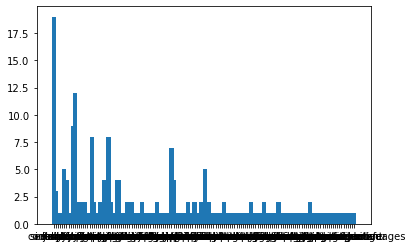

In [21]:
plt.bar(tags_freq.keys(), tags_freq.values(), 2)

In [28]:
a = sorted(tags_freq.items(), key=lambda x: -x[1])    
a_max=a[:10]

In [29]:
a_max

[('c#', 19),
 ('.net', 12),
 ('python', 9),
 ('c++', 8),
 ('java', 8),
 ('sql', 7),
 ('php', 5),
 ('performance', 5),
 ('javascript', 4),
 ('regex', 4)]

In [30]:
tot=0
for curr_key in tags_freq:
    tot+=tags_freq[curr_key]

In [31]:
tot

250

In [32]:
done=0
for t in a_max:
    done+=t[1]

In [33]:
done

81

In [34]:
a_max.append(('Others',tot-done))

In [35]:
a_max

[('c#', 19),
 ('.net', 12),
 ('python', 9),
 ('c++', 8),
 ('java', 8),
 ('sql', 7),
 ('php', 5),
 ('performance', 5),
 ('javascript', 4),
 ('regex', 4),
 ('Others', 169)]

In [36]:
the_dict=dict()
for t in a_max:
    the_dict[t[0]]=t[1]

<BarContainer object of 11 artists>

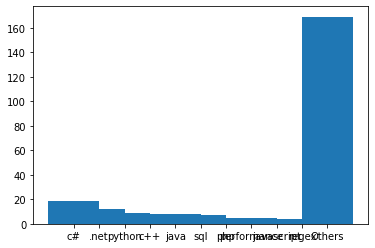

In [38]:
plt.bar(the_dict.keys(), the_dict.values(), 2)

In [41]:
arr=[]
for curr_key,curr_val in the_dict.items():
    print(curr_key)
    arr.extend([curr_key]*curr_val)

c#
.net
python
c++
java
sql
php
performance
javascript
regex
Others


In [42]:
len(arr)

250

In [44]:
df=pd.DataFrame({"arr":arr})

In [46]:
df

,arr
0,c#
1,c#
2,c#
3,c#
4,c#
...,...
245,Others
246,Others
247,Others
248,Others


In [61]:
from matplotlib.pyplot import figure

plt.rcParams["figure.figsize"] = (12,6)

Text(0, 0.5, 'Frequency')

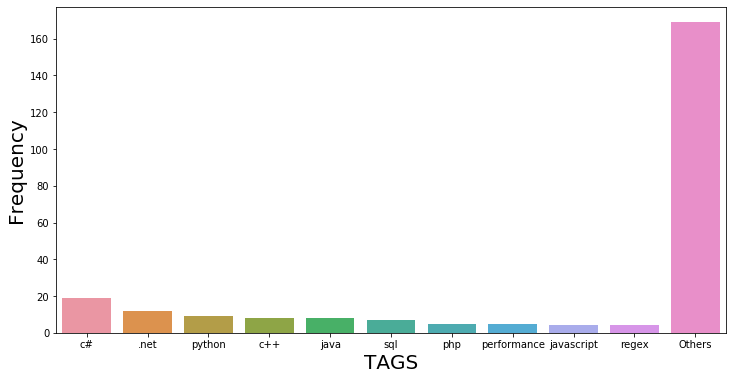

In [66]:
ax = sns.countplot(x="arr",data=df)
plt.xlabel("TAGS", fontsize=20)
plt.ylabel("Frequency", fontsize=20)

In [67]:
len(child_tags)

100

In [68]:
len(parent_tags)

0

In [70]:
parent_to_child_mapping

{314242: ['440482'],
 168214: ['440494'],
 101268: ['440952'],
 263400: ['441529'],
 130161: ['441910'],
 8676: ['442377'],
 264175: ['442377'],
 267357: ['442377'],
 276433: ['442377'],
 391486: ['442377'],
 46586: ['443655'],
 180172: ['444322'],
 292265: ['444436'],
 408987: ['444436'],
 425953: ['444480'],
 49809: ['445624'],
 293152: ['445624'],
 418597: ['445624'],
 418692: ['445624'],
 401726: ['445642'],
 147181: ['446208', '516399'],
 348210: ['446728'],
 103785: ['448230'],
 282805: ['448230'],
 335311: ['449445'],
 413898: ['449445'],
 156430: ['450696'],
 201323: ['450696', '508108'],
 211842: ['450696'],
 238265: ['450924'],
 7074: ['452368'],
 215255: ['452368'],
 337304: ['452571'],
 81584: ['452677'],
 172753: ['452917'],
 356948: ['452917'],
 58968: ['454002'],
 129178: ['454921'],
 170921: ['455498'],
 130404: ['456646'],
 119506: ['457482'],
 15828: ['457636'],
 449595: ['458755'],
 78696: ['460904'],
 325046: ['461054'],
 15142: ['462978'],
 4736: ['465119'],
 15373

In [88]:
len(child_tags)

100

In [89]:
len(parent_tags)

100

In [92]:
ans=0
for curr_key in child_tags:
    arr1=child_tags[curr_key]
    arr2=parent_tags[curr_key]
    if bool(set(arr1) & set(arr2)):
        ans+=1
    else:
        print(curr_key)

441910
450924
476993
495018
495244
513315


In [91]:
ans

94